In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Input
from tensorflow.keras.optimizers import Adam


In [2]:
def generate_synthetic_data(num_samples, sequence_length):
    synthetic_data = []
    for _ in range(num_samples):
        sequence = ''.join(np.random.choice(['A', 'C', 'G', 'T'], sequence_length))
        synthetic_data.append(sequence)
    return synthetic_data

num_samples = 1000
sequence_length = 50
synthetic_data = generate_synthetic_data(num_samples, sequence_length)


In [3]:
def create_image(sequence):
    # Define o mapeamento de bases para cores (preto e branco)
    base_colors = {'A': 0, 'C': 127, 'G': 255, 'T': 255}

    # Inicializa uma matriz vazia para a imagem
    image = np.zeros((len(sequence), 1), dtype=np.uint8)

    # Preenche a imagem com base nas sequências de DNA
    for i, base in enumerate(sequence):
        image[i, 0] = base_colors[base]

    return image

# Crie imagens a partir das sequências de DNA
synthetic_images = [create_image(sequence) for sequence in synthetic_data]
synthetic_images = np.array(synthetic_images)
synthetic_images = synthetic_images / 255.0  # Normalize os valores para o intervalo [0, 1]


In [4]:
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(synthetic_images.shape[1] * synthetic_images.shape[2], activation='tanh'))
    model.add(Reshape((synthetic_images.shape[1], synthetic_images.shape[2], 1)))
    return model

generator = build_generator()


In [5]:
def build_discriminator(input_shape):
    model = Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

discriminator = build_discriminator(synthetic_images.shape[1:])


In [6]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(gan_input, gan_output)
    return gan

gan = build_gan(generator, discriminator)



In [7]:
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


4/4 [==============================] - 0s 12ms/step
Epoch 0/100, D Loss: 0.7106586992740631, G Loss: 0.7222171425819397
1/1 [==============================] - 1s 598ms/step


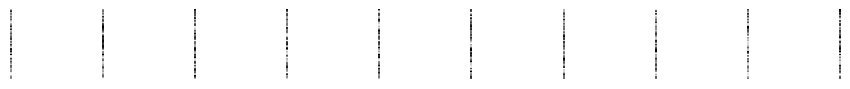

4/4 [==============================] - 0s 5ms/step
Epoch 1/100, D Loss: 0.7259541153907776, G Loss: 0.6830602288246155
4/4 [==============================] - 0s 4ms/step
Epoch 2/100, D Loss: 0.7387937307357788, G Loss: 0.6534488797187805
4/4 [==============================] - 0s 4ms/step
Epoch 3/100, D Loss: 0.7550029456615448, G Loss: 0.6324254274368286
4/4 [==============================] - 0s 4ms/step
Epoch 4/100, D Loss: 0.7665371298789978, G Loss: 0.6070067882537842
4/4 [==============================] - 0s 5ms/step
Epoch 5/100, D Loss: 0.7730307579040527, G Loss: 0.5854620337486267
4/4 [==============================] - 0s 5ms/step
Epoch 6/100, D Loss: 0.785602480173111, G Loss: 0.574386477470398
4/4 [==============================] - 0s 5ms/step
Epoch 7/100, D Loss: 0.7915980815887451, G Loss: 0.5647351741790771
4/4 [==============================] - 0s 5ms/step
Epoch 8/100, D Loss: 0.806098997592926, G Loss: 0.5465906858444214
4/4 [==============================] - 0s 5ms/step


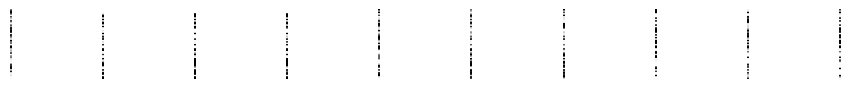

4/4 [==============================] - 0s 5ms/step
Epoch 11/100, D Loss: 0.8140743672847748, G Loss: 0.5303807854652405
4/4 [==============================] - 0s 5ms/step
Epoch 12/100, D Loss: 0.8314878344535828, G Loss: 0.5330811738967896
4/4 [==============================] - 0s 4ms/step
Epoch 13/100, D Loss: 0.8238321244716644, G Loss: 0.5277891755104065
4/4 [==============================] - 0s 5ms/step
Epoch 14/100, D Loss: 0.8324621319770813, G Loss: 0.5169112682342529
4/4 [==============================] - 0s 5ms/step
Epoch 15/100, D Loss: 0.8261508345603943, G Loss: 0.5113605260848999
4/4 [==============================] - 0s 4ms/step
Epoch 16/100, D Loss: 0.8313151597976685, G Loss: 0.5075283050537109
4/4 [==============================] - 0s 5ms/step
Epoch 17/100, D Loss: 0.832798182964325, G Loss: 0.5076870918273926
4/4 [==============================] - 0s 4ms/step
Epoch 18/100, D Loss: 0.8374244868755341, G Loss: 0.5008561611175537
4/4 [==============================] - 0s

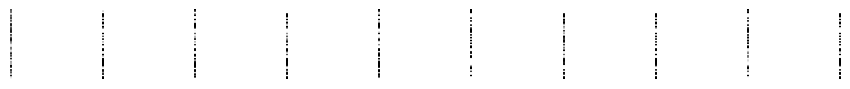

4/4 [==============================] - 0s 4ms/step
Epoch 21/100, D Loss: 0.8444060683250427, G Loss: 0.4948362112045288
4/4 [==============================] - 0s 5ms/step
Epoch 22/100, D Loss: 0.8500298857688904, G Loss: 0.49502474069595337
4/4 [==============================] - 0s 5ms/step
Epoch 23/100, D Loss: 0.8541019558906555, G Loss: 0.4884222745895386
4/4 [==============================] - 0s 4ms/step
Epoch 24/100, D Loss: 0.8498203754425049, G Loss: 0.4888682961463928
4/4 [==============================] - 0s 5ms/step
Epoch 25/100, D Loss: 0.8537383675575256, G Loss: 0.48759725689888
4/4 [==============================] - 0s 5ms/step
Epoch 26/100, D Loss: 0.8606521785259247, G Loss: 0.48918190598487854
4/4 [==============================] - 0s 4ms/step
Epoch 27/100, D Loss: 0.8572250604629517, G Loss: 0.4890192151069641
4/4 [==============================] - 0s 5ms/step
Epoch 28/100, D Loss: 0.8569535315036774, G Loss: 0.48330527544021606
4/4 [==============================] - 

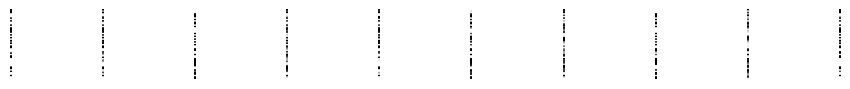

4/4 [==============================] - 0s 4ms/step
Epoch 31/100, D Loss: 0.8635116219520569, G Loss: 0.4783259630203247
4/4 [==============================] - 0s 4ms/step
Epoch 32/100, D Loss: 0.8582545220851898, G Loss: 0.4721943140029907
4/4 [==============================] - 0s 5ms/step
Epoch 33/100, D Loss: 0.8572501540184021, G Loss: 0.47065603733062744
4/4 [==============================] - 0s 5ms/step
Epoch 34/100, D Loss: 0.8671308755874634, G Loss: 0.4715670943260193
4/4 [==============================] - 0s 5ms/step
Epoch 35/100, D Loss: 0.8645505309104919, G Loss: 0.4713907539844513
4/4 [==============================] - 0s 4ms/step
Epoch 36/100, D Loss: 0.8606360852718353, G Loss: 0.47191962599754333
4/4 [==============================] - 0s 5ms/step
Epoch 37/100, D Loss: 0.8645194172859192, G Loss: 0.47264528274536133
4/4 [==============================] - 0s 4ms/step
Epoch 38/100, D Loss: 0.8724597990512848, G Loss: 0.462003231048584
4/4 [==============================] -

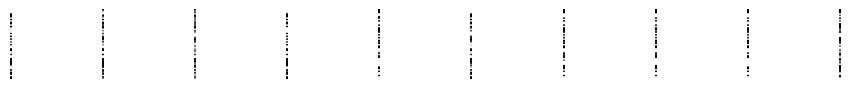

4/4 [==============================] - 0s 10ms/step
Epoch 41/100, D Loss: 0.8690921366214752, G Loss: 0.4648519456386566
4/4 [==============================] - 0s 4ms/step
Epoch 42/100, D Loss: 0.8733832240104675, G Loss: 0.4666297733783722
4/4 [==============================] - 0s 5ms/step
Epoch 43/100, D Loss: 0.8807565569877625, G Loss: 0.4584603011608124
4/4 [==============================] - 0s 5ms/step
Epoch 44/100, D Loss: 0.8836842179298401, G Loss: 0.45450669527053833
4/4 [==============================] - 0s 5ms/step
Epoch 45/100, D Loss: 0.8832549154758453, G Loss: 0.46287012100219727
4/4 [==============================] - 0s 6ms/step
Epoch 46/100, D Loss: 0.876961886882782, G Loss: 0.4544979929924011
4/4 [==============================] - 0s 5ms/step
Epoch 47/100, D Loss: 0.8740670382976532, G Loss: 0.45524126291275024
4/4 [==============================] - 0s 7ms/step
Epoch 48/100, D Loss: 0.8704381883144379, G Loss: 0.4530075490474701
4/4 [==============================] 

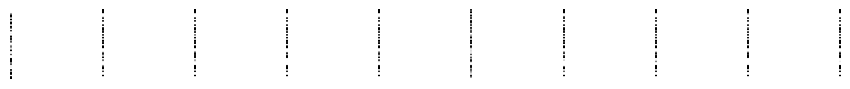

4/4 [==============================] - 0s 8ms/step
Epoch 51/100, D Loss: 0.8869009017944336, G Loss: 0.4504334628582001
4/4 [==============================] - 0s 5ms/step
Epoch 52/100, D Loss: 0.8811505138874054, G Loss: 0.4469022750854492
4/4 [==============================] - 0s 6ms/step
Epoch 53/100, D Loss: 0.8759019672870636, G Loss: 0.45167580246925354
4/4 [==============================] - 0s 5ms/step
Epoch 54/100, D Loss: 0.8823857307434082, G Loss: 0.4514222741127014
4/4 [==============================] - 0s 5ms/step
Epoch 55/100, D Loss: 0.8828591704368591, G Loss: 0.4479367136955261
4/4 [==============================] - 0s 5ms/step
Epoch 56/100, D Loss: 0.8850168287754059, G Loss: 0.44138413667678833
4/4 [==============================] - 0s 5ms/step
Epoch 57/100, D Loss: 0.8912941515445709, G Loss: 0.44520485401153564
4/4 [==============================] - 0s 5ms/step
Epoch 58/100, D Loss: 0.888839602470398, G Loss: 0.44879350066185
4/4 [==============================] - 0

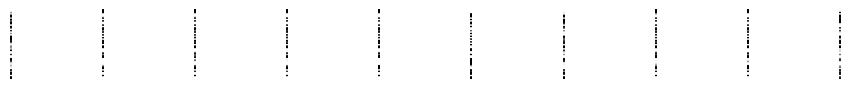

4/4 [==============================] - 0s 7ms/step
Epoch 61/100, D Loss: 0.8925289809703827, G Loss: 0.43700093030929565
4/4 [==============================] - 0s 7ms/step
Epoch 62/100, D Loss: 0.888771116733551, G Loss: 0.4350753128528595
4/4 [==============================] - 0s 5ms/step
Epoch 63/100, D Loss: 0.9016128778457642, G Loss: 0.43921780586242676
4/4 [==============================] - 0s 5ms/step
Epoch 64/100, D Loss: 0.8855201303958893, G Loss: 0.44007039070129395
4/4 [==============================] - 0s 5ms/step
Epoch 65/100, D Loss: 0.8899968862533569, G Loss: 0.4377516508102417
4/4 [==============================] - 0s 4ms/step
Epoch 66/100, D Loss: 0.8962323069572449, G Loss: 0.4393441081047058
4/4 [==============================] - 0s 4ms/step
Epoch 67/100, D Loss: 0.8921524286270142, G Loss: 0.4336080551147461
4/4 [==============================] - 0s 5ms/step
Epoch 68/100, D Loss: 0.897823303937912, G Loss: 0.43431416153907776
4/4 [==============================] -

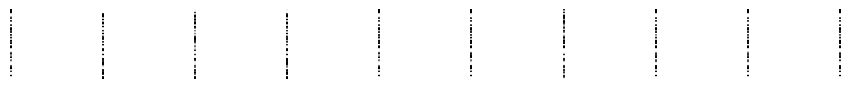

4/4 [==============================] - 0s 9ms/step
Epoch 71/100, D Loss: 0.9138011634349823, G Loss: 0.4312114417552948
4/4 [==============================] - 0s 5ms/step
Epoch 72/100, D Loss: 0.8992425203323364, G Loss: 0.43001237511634827
4/4 [==============================] - 0s 5ms/step
Epoch 73/100, D Loss: 0.8994350731372833, G Loss: 0.4287869334220886
4/4 [==============================] - 0s 5ms/step
Epoch 74/100, D Loss: 0.8980748951435089, G Loss: 0.42548877000808716
4/4 [==============================] - 0s 6ms/step
Epoch 75/100, D Loss: 0.9086600542068481, G Loss: 0.4271736145019531
4/4 [==============================] - 0s 5ms/step
Epoch 76/100, D Loss: 0.9069902300834656, G Loss: 0.4270920157432556
4/4 [==============================] - 0s 4ms/step
Epoch 77/100, D Loss: 0.9025678634643555, G Loss: 0.4223068654537201
4/4 [==============================] - 0s 4ms/step
Epoch 78/100, D Loss: 0.9092863500118256, G Loss: 0.4209862947463989
4/4 [==============================] -

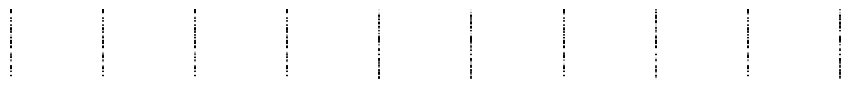

4/4 [==============================] - 0s 7ms/step
Epoch 81/100, D Loss: 0.9138745367527008, G Loss: 0.4265825152397156
4/4 [==============================] - 0s 5ms/step
Epoch 82/100, D Loss: 0.9175998270511627, G Loss: 0.42257213592529297
4/4 [==============================] - 0s 4ms/step
Epoch 83/100, D Loss: 0.9091613292694092, G Loss: 0.4169681966304779
4/4 [==============================] - 0s 5ms/step
Epoch 84/100, D Loss: 0.9112346172332764, G Loss: 0.41647788882255554
4/4 [==============================] - 0s 5ms/step
Epoch 85/100, D Loss: 0.9161318242549896, G Loss: 0.4169721007347107
4/4 [==============================] - 0s 5ms/step
Epoch 86/100, D Loss: 0.9114902913570404, G Loss: 0.41298964619636536
4/4 [==============================] - 0s 5ms/step
Epoch 87/100, D Loss: 0.9126889109611511, G Loss: 0.41634535789489746
4/4 [==============================] - 0s 4ms/step
Epoch 88/100, D Loss: 0.9154937267303467, G Loss: 0.4107396602630615
4/4 [==============================]

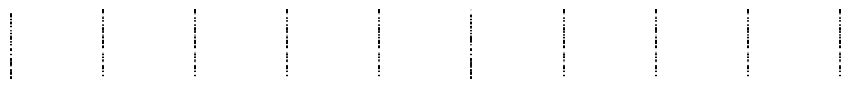

4/4 [==============================] - 0s 8ms/step
Epoch 91/100, D Loss: 0.9191346168518066, G Loss: 0.41043463349342346
4/4 [==============================] - 0s 6ms/step
Epoch 92/100, D Loss: 0.9366055130958557, G Loss: 0.407096266746521
4/4 [==============================] - 0s 4ms/step
Epoch 93/100, D Loss: 0.9184585213661194, G Loss: 0.4095497727394104
4/4 [==============================] - 0s 5ms/step
Epoch 94/100, D Loss: 0.9245364665985107, G Loss: 0.4054197072982788
4/4 [==============================] - 0s 5ms/step
Epoch 95/100, D Loss: 0.9200995862483978, G Loss: 0.4091542959213257
4/4 [==============================] - 0s 4ms/step
Epoch 96/100, D Loss: 0.924098551273346, G Loss: 0.40379613637924194
4/4 [==============================] - 0s 6ms/step
Epoch 97/100, D Loss: 0.9259544014930725, G Loss: 0.40279877185821533
4/4 [==============================] - 0s 4ms/step
Epoch 98/100, D Loss: 0.934623658657074, G Loss: 0.4095221757888794
4/4 [==============================] - 0

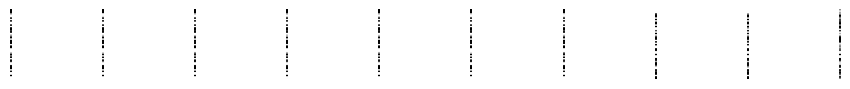

In [8]:
def train_gan(generator, discriminator, gan, synthetic_images, epochs=1, batch_size=128):
    batch_count = synthetic_images.shape[0] // batch_size

    for e in range(epochs + 1):
        for _ in range(batch_count):
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            generated_images = generator.predict(noise)
            image_batch = synthetic_images[np.random.randint(0, synthetic_images.shape[0], size=batch_size)]
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(image_batch, np.ones((batch_size, 1)))
            d_loss_fake = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            noise = np.random.normal(0, 1, size=[batch_size, 100])
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        print(f"Epoch {e}/{epochs}, D Loss: {d_loss}, G Loss: {g_loss}")

        if e % 10 == 0:
            plot_generated_images(e, generator)

def plot_generated_images(epoch, generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, size=[examples, 100])
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)
    for i in range(examples):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(f"gan_generated_image_epoch_{epoch}.png")
    plt.show()

# Treinamento do GAN
train_gan(generator, discriminator, gan, synthetic_images, epochs=100, batch_size=128)
